# Bias and Variance Analysis

### Problem 1

Consider a learning scenario where the goal is to learn the target function $f(x) = sin(\pi x)$ for $-1 \le x \le +1$ from two points in the training sets. The two training points in $R^2$ have a uniform distribution between -1 and +1. You are to choose a model from the constant hypothesis set $y = b$ or linear hypothesis set $y = mx + b$ based on bias-variance analysis.

1. Generate 10,000 hypotheses in each hypothesis space. Report the average hypothesis $\overline{g}(x)$ in each case.

In [5]:
# Generate 10,000 x values for the constant and linear hypothesis
import numpy as np

np.random.seed(42)
hypo_list = np.random.uniform(-1, 1, size=(10000,2))

print(hypo_list.shape)

(10000, 2)


In [6]:
# Put x1 and x2 into a dataframe
import pandas as pd

df = pd.DataFrame(hypo_list, columns=['x1','x2'])
df

,x1,x2
0,-0.250920,0.901429
1,0.463988,0.197317
2,-0.687963,-0.688011
3,-0.883833,0.732352
4,0.202230,0.416145
...,...,...
9995,0.149156,0.518647
9996,-0.820969,-0.014672
9997,0.802077,0.754077
9998,-0.906372,-0.392603


In [7]:
# Define f(x)
def f(x):
    return np.sin(np.pi * x)
# Find y1 and y2
df['y1'] = f(df['x1'])
df['y2'] = f(df['x2'])
df.head()

,x1,x2,y1,y2
0,-0.250920,0.901429,-0.709147,0.304745
1,0.463988,0.197317,0.993607,0.580945
2,-0.687963,-0.688011,-0.830661,-0.830577
3,-0.883833,0.732352,-0.356903,0.745204
4,0.202230,0.416145,0.593439,0.965500


In [8]:
# Find the slopes and intercepts for the linear hypothesis

df['slopes'] = (df['y2'] - df['y1'])/(df['x2'] - df['x1'])
df['intercepts'] = (df['y1']) - (df['slopes'] * df['x1'])

df.head()

,x1,x2,y1,y2,slopes,intercepts
0,-0.250920,0.901429,-0.709147,0.304745,0.879849,-0.488376
1,0.463988,0.197317,0.993607,0.580945,1.547457,0.275606
2,-0.687963,-0.688011,-0.830661,-0.830577,-1.749368,-2.034161
3,-0.883833,0.732352,-0.356903,0.745204,0.681918,0.245799
4,0.202230,0.416145,0.593439,0.965500,1.739297,0.241701


In [9]:
# Find a list of intercepts for the constant hypothesis

df['c_list'] = (df['y1'] + df['y2'])/2
df.head()

,x1,x2,y1,y2,slopes,intercepts,c_list
0,-0.250920,0.901429,-0.709147,0.304745,0.879849,-0.488376,-0.202201
1,0.463988,0.197317,0.993607,0.580945,1.547457,0.275606,0.787276
2,-0.687963,-0.688011,-0.830661,-0.830577,-1.749368,-2.034161,-0.830619
3,-0.883833,0.732352,-0.356903,0.745204,0.681918,0.245799,0.194150
4,0.202230,0.416145,0.593439,0.965500,1.739297,0.241701,0.779470


In [10]:
# Find average for the constant hypothesis

avg_c = np.mean(df['c_list'])
print(f'The average for the constant hypothesis is: {avg_c}')

The average for the constant hypothesis is: -0.0016939870855342157


In [11]:
# Find average for the linear hypothesis

avg_slope = np.mean(df['slopes'])
avg_int = np.mean(df['intercepts'])

print(f'The average for the linear hypothesis is: {avg_slope}x + {avg_int}')

The average for the linear hypothesis is: 0.7799826476373173x + -0.008477770343247686


2. Find and report $bias^2$ for each model.

In [13]:
# Generate 10,000 x-values for testing
x_test = np.linspace(-1, 1, 10000)
x_test.shape
f_list = f(x_test)

In [14]:
# Find bias for constant hypothesis
bias_c = np.mean((f_list - avg_c)**2)
bias_c

0.49995286959224594

In [15]:
# Find bias for linear hypothesis
avg_lin = avg_slope * x_test + avg_int
bias_lin = np.mean((avg_lin - f_list)**2)
bias_lin

0.20635070769894437

3. Find and report variance for each model

In [17]:
# Find variance for constant hypothesis
var_c = np.mean((df['c_list'] - avg_c)**2)
var_c

0.2509218910688384

In [18]:
# Find variance for linear ypothesis
g_x = {}

for i in range(len(x_test)):
    g_x[i] = (df['slopes'] * x_test[i] + df['intercepts'])
df_gx = pd.DataFrame(g_x)

var_x = df_gx.var()

var_lin = np.mean(var_x)
var_lin

1.655701759951252

4. For each case, plot $\overline{g}(x) \pm \sqrt{var(x)}$ along with $\overline{g}(x)$ and target function $f(x) = sin(\pi x)$. Which model will you choose? Why? Round your answers to 3 decimal places.

In [20]:
avg_c_list = np.repeat(avg_c, 10000)
avg_c_list

array([-0.00169399, -0.00169399, -0.00169399, ..., -0.00169399,
       -0.00169399, -0.00169399])

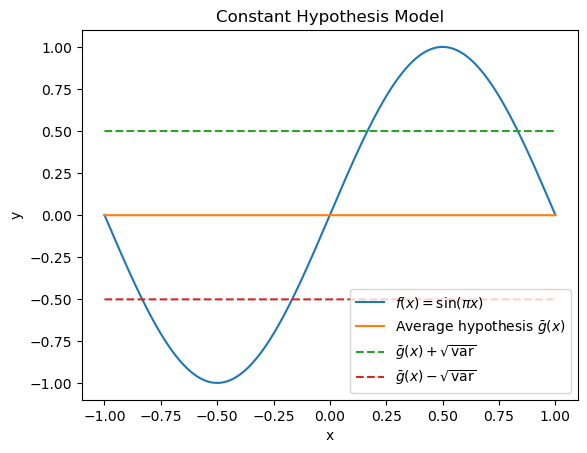

In [21]:
# Plot the constant hypothesis model
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x_test, f_list, label=r'$f(x)=\sin(\pi x)$')
plt.plot(x_test, avg_c_list, label=r'Average hypothesis $\bar{g}(x)$')
plt.plot(x_test, avg_c_list + np.sqrt(var_c), '--', label=r'$\bar{g}(x)+\sqrt{\mathrm{var}}$')
plt.plot(x_test, avg_c_list - np.sqrt(var_c), '--', label=r'$\bar{g}(x)-\sqrt{\mathrm{var}}$')
plt.title('Constant Hypothesis Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

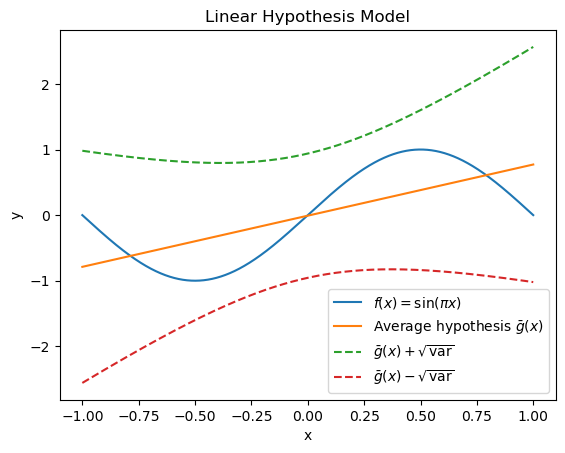

In [22]:
# Plot the linear hypothesis model

plt.figure()
plt.plot(x_test, f_list, label=r'$f(x)=\sin(\pi x)$')
plt.plot(x_test, avg_lin, label=r'Average hypothesis $\bar{g}(x)$')
plt.plot(x_test, avg_lin + np.sqrt(var_x), '--', label=r'$\bar{g}(x)+\sqrt{\mathrm{var}}$')
plt.plot(x_test, avg_lin - np.sqrt(var_x), '--', label=r'$\bar{g}(x)-\sqrt{\mathrm{var}}$')
plt.title('Linear Hypothesis Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

In [23]:
error_c = bias_c + var_c
error_c

0.7508747606610844

In [24]:
error_lin = bias_lin + var_lin
error_lin

1.8620524676501964

The constant model has a total error of 0.751 and the linear model has a total error of 1.862. I would choose the constant model because the constant model has a lower total error than the linear model.